In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
df_total = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_total.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_total due to lack of information
df_total = df_total[~(df_total["PATIENT_NO"].isin([172, 173, 174]))]

df_train = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_train.csv', encoding="utf-8")

df_test = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_test.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_test due to lack of information
df_test = df_test[~(df_test["PATIENT_NO"].isin([172, 173, 174]))]

In [3]:
df_total.info()
df_total.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 17 columns):
PATIENT_NO            171 non-null int64
AGE                   171 non-null float64
SEX                   171 non-null int64
ORIGIN_EUROPE         171 non-null int64
ORIGIN_CHINA          171 non-null int64
ORIGIN_US             171 non-null int64
ORIGIN_ASEAN          171 non-null int64
ORIGIN_DOMESTIC       171 non-null int64
DAYS_OF_ONSET         171 non-null int64
ONSET_FEVER           171 non-null int64
ONSET_COUGH           171 non-null int64
ONSET_TIRED           171 non-null int64
ONSET_SORETHROAT      171 non-null int64
ONSET_RESPIRATORY     171 non-null int64
BACKGROUND_DISEASE    171 non-null int64
HOSPITAL              171 non-null int64
LOS                   20 non-null float64
dtypes: float64(2), int64(15)
memory usage: 24.0 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,LOS
166,167,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN
167,168,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
168,169,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
169,170,27.0,1,0,0,0,0,1,5,1,0,0,0,0,0,0,NaN
170,171,19.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,NaN


In [4]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
PATIENT_NO            20 non-null int64
AGE                   20 non-null float64
SEX                   20 non-null int64
ORIGIN_EUROPE         20 non-null int64
ORIGIN_CHINA          20 non-null int64
ORIGIN_US             20 non-null int64
ORIGIN_ASEAN          20 non-null int64
ORIGIN_DOMESTIC       20 non-null int64
DAYS_OF_ONSET         20 non-null int64
ONSET_FEVER           20 non-null int64
ONSET_COUGH           20 non-null int64
ONSET_TIRED           20 non-null int64
ONSET_SORETHROAT      20 non-null int64
ONSET_RESPIRATORY     20 non-null int64
BACKGROUND_DISEASE    20 non-null int64
HOSPITAL              20 non-null int64
LOS                   20 non-null int64
dtypes: float64(1), int64(16)
memory usage: 2.7 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,LOS
0,1,66.0,1,0,1,0,0,0,6,0,0,0,0,0,2,1,20
1,2,28.0,1,0,1,0,0,0,3,0,0,0,0,0,0,1,12
2,3,25.0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,4
3,4,29.0,1,0,1,0,0,0,9,0,0,0,0,0,0,0,19
4,5,23.0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,11


In [5]:
df_test.info()
df_test.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 17 columns):
PATIENT_NO            151 non-null int64
AGE                   151 non-null float64
SEX                   151 non-null int64
ORIGIN_EUROPE         151 non-null int64
ORIGIN_CHINA          151 non-null int64
ORIGIN_US             151 non-null int64
ORIGIN_ASEAN          151 non-null int64
ORIGIN_DOMESTIC       151 non-null int64
DAYS_OF_ONSET         151 non-null int64
ONSET_FEVER           151 non-null int64
ONSET_COUGH           151 non-null int64
ONSET_TIRED           151 non-null int64
ONSET_SORETHROAT      151 non-null int64
ONSET_RESPIRATORY     151 non-null int64
BACKGROUND_DISEASE    151 non-null int64
HOSPITAL              151 non-null int64
LOS                   0 non-null float64
dtypes: float64(2), int64(15)
memory usage: 21.2 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,LOS
146,167,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN
147,168,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
148,169,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
149,170,27.0,1,0,0,0,0,1,5,1,0,0,0,0,0,0,NaN
150,171,19.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,NaN


In [6]:
# target variable (LOS)
LOS = df_train['LOS'].values

# extract patient no to build a new dataset for comparision between models
PATIENT_NO_test = df_test['PATIENT_NO']

In [7]:
# split train set and test set (without y_test)
X_train = df_train.drop(columns = ['LOS', 'PATIENT_NO'])

y_train = LOS

X_test = df_test.drop(columns = ['LOS', 'PATIENT_NO'])

In [8]:
X_train.describe()


,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.0,20.00000,20.000000
mean,37.312500,0.400000,0.100000,0.450000,0.050000,0.0,0.400000,4.450000,0.0,0.100000,0.050000,0.050000,0.0,0.15000,0.150000
std,18.727421,0.502625,0.307794,0.510418,0.223607,0.0,0.502625,3.332061,0.0,0.307794,0.223607,0.223607,0.0,0.48936,0.366348
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
25%,26.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
50%,29.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.500000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
75%,51.250000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,7.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,13.000000,0.0,1.000000,1.000000,1.000000,0.0,2.00000,1.000000


In [9]:
X_test.describe()

,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL
count,151.000000,151.000000,151.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,34.251656,0.503311,0.602649,0.0,0.059603,0.059603,0.245033,0.973510,0.231788,0.145695,0.026490,0.059603,0.046358,0.039735,0.145695
std,16.443932,0.501653,0.490978,0.0,0.237537,0.237537,0.431538,1.949178,0.423379,0.353975,0.161122,0.237537,0.210958,0.195986,0.353975
min,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
linear_models = [LinearRegression(),
                Ridge(),
                Lasso(),
                SGDRegressor()]

results = [PATIENT_NO_test]

for model in linear_models:
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    results.append(y_test_preds)
    
    # Grab model name and store results associated with model
    # impossible to calculate r2 score dude to lack of y_test
    name = str(model).split("(")[0]
    print('{} finished.'.format(name))

LinearRegression finished.
Ridge finished.
Lasso finished.
SGDRegressor finished.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [11]:
df_results = pd.DataFrame(np.transpose(results))

df_results = df_results.rename(columns={0 : "PATIENT_NO", 
                                        1 : "LOS_LinearRegression",
                                        2 : "LOS_RidgeRegression",
                                        3 : "LOS_LassoRegression",
                                        4 : "LOS_SGDRegressor"})

df_results

,PATIENT_NO,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression,LOS_SGDRegressor
0,17.0,14.910886,14.115335,11.071785,-2.883276e+12
1,19.0,13.173605,12.964271,12.400243,-2.878186e+12
2,20.0,20.376011,19.411708,17.625605,-6.823994e+12
3,23.0,19.088280,17.726564,17.908057,-7.056603e+12
4,24.0,20.847170,18.348778,16.540803,-6.221923e+12
5,25.0,19.205987,18.241828,19.037866,-7.909845e+12
6,26.0,19.102994,17.790972,18.049283,-7.163258e+12
7,27.0,21.153850,18.238664,15.648441,-5.357966e+12
8,28.0,25.790431,21.984132,18.331736,-7.376133e+12
9,29.0,21.448118,19.526823,18.472962,-7.491072e+12


In [12]:
df_usable_results = df_results.drop(columns = ['LOS_SGDRegressor'])

df_usable_results

,PATIENT_NO,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression
0,17.0,14.910886,14.115335,11.071785
1,19.0,13.173605,12.964271,12.400243
2,20.0,20.376011,19.411708,17.625605
3,23.0,19.088280,17.726564,17.908057
4,24.0,20.847170,18.348778,16.540803
5,25.0,19.205987,18.241828,19.037866
6,26.0,19.102994,17.790972,18.049283
7,27.0,21.153850,18.238664,15.648441
8,28.0,25.790431,21.984132,18.331736
9,29.0,21.448118,19.526823,18.472962


In [13]:
df_usable_results.to_csv(r'./linear_models_untuned.csv', index = False)

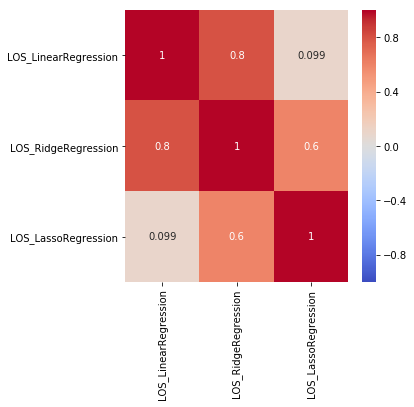

In [14]:
corr_matrix_usable_results = df_usable_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix_usable_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)

## Parameter tuning for Ridge Regression

In [15]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [16]:
tuned_parameters_Ridge = [{
    'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 5 , 10, 20]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_Ridge = Ridge()
grid_Ridge = GridSearchCV(reg_model_Ridge, tuned_parameters_Ridge, scoring = "neg_mean_squared_error", cv = 5)
grid_Ridge.fit(X_train, y_train)
reg_model_Ridge_optimized = grid_Ridge.best_estimator_

# summarize the results of the grid search
print(grid_Ridge.best_score_)
print(grid_Ridge.best_estimator_)

-24.88270549569824
Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.08983e-19): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.05592e-19): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.61008e-20): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.32937e-19): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.17831e-19): result may not be accurate.
  overwrite_a=True).T


In [17]:
y_test_preds_Ridge = reg_model_Ridge_optimized.predict(X_test)

df_usable_results['LOS_RidgeRegression'] = y_test_preds_Ridge

## Parameter tuning for LASSO Regression

In [18]:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [19]:
tuned_parameters_Lasso = [{
    'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 5 , 10, 20]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_Lasso = Lasso(max_iter = 1e5)
grid_Lasso = GridSearchCV(reg_model_Lasso, tuned_parameters_Lasso, scoring = "neg_mean_squared_error", cv = 5)
grid_Lasso.fit(X_train, y_train)
reg_model_Lasso_optimized = grid_Lasso.best_estimator_

# summarize the results of the grid search
print(grid_Lasso.best_score_)
print(grid_Lasso.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

-22.500882131218557
Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [20]:
y_test_preds_Lasso = reg_model_Lasso_optimized.predict(X_test)

df_usable_results['LOS_LassoRegression'] = y_test_preds_Lasso

In [21]:
df_usable_results

,PATIENT_NO,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression
0,17.0,14.910886,11.577881,11.275083
1,19.0,13.173605,12.606001,11.409882
2,20.0,20.376011,18.135576,16.397457
3,23.0,19.088280,17.936256,16.667055
4,24.0,20.847170,17.008116,15.588661
5,25.0,19.205987,18.965317,17.745450
6,26.0,19.102994,18.064889,16.801855
7,27.0,21.153850,16.297856,14.510266
8,28.0,25.790431,19.092323,17.071453
9,29.0,21.448118,18.870508,17.206253


In [22]:
df_usable_results.to_csv(r'./linear_models_tuned.csv', index = False)

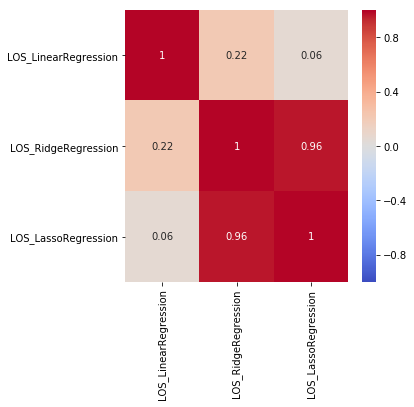

In [23]:
corr_matrix_tuned_results = df_usable_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix_tuned_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)